## 1. Work_Year Analysis Univariate Analysis
## 2. Experience Level vs Number of Job Listings
## 3. Education Level vs Number of Job Listings
## 4. Job Title vs Salary (Top 10)
## 5. Company_size vs Remote_Ratio

In [39]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as np
import zipfile

In [37]:
#Read in CSV
salary = "./ds_salaries.csv"
df = pd.read_csv(salary)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [38]:
#Finding and dropping duplicate rows
duplicates = df[df.duplicated()]
df = df.drop_duplicates()
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
#Count of unique values
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [34]:
#Null Values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [66]:
#Shape of Dataframe (Rows, Columns)
shape = df.shape
shape

(2584, 11)

In [67]:
#Info about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
work_year             2584 non-null int64
experience_level      2584 non-null object
employment_type       2584 non-null object
job_title             2584 non-null object
salary                2584 non-null int64
salary_currency       2584 non-null object
salary_in_usd         2584 non-null int64
employee_residence    2584 non-null object
remote_ratio          2584 non-null int64
company_location      2584 non-null object
company_size          2584 non-null object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [68]:
#Summary Statistics of the Dataframe
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


## Univariate Analysis of Work_Year

In [69]:
#Work_Year Counts
wy = df["work_year"].value_counts()
wy

2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64

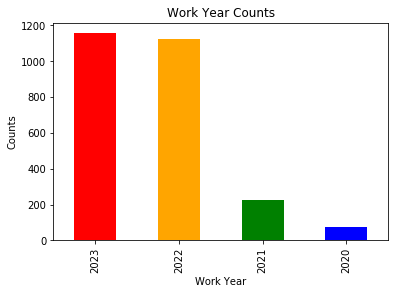

In [70]:
#Plotting Work Year (Univariate Plot)
fig, ax = plt.subplots()
color = ["red", "orange", "green", "blue"]
bars = wy.plot(kind="bar", title = "Work Year Counts", color = color)
ax.set_xlabel('Work Year')
ax.set_ylabel('Counts')
plt.show()

## Experience Level vs Number of Job Listings

In [71]:
#Experience_Level Counts
exp = df["experience_level"].value_counts()
exp

SE    1554
MI     664
EN     270
EX      96
Name: experience_level, dtype: int64

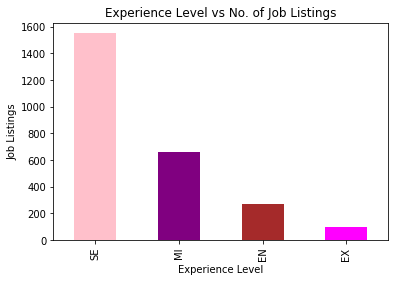

In [72]:
#Plotting Experience Level vs Number of Job Listings
fig, ax = plt.subplots()
color = ["pink", "purple", "brown", "magenta"]
bars = exp.plot(kind="bar", title = "Experience Level vs No. of Job Listings", color = color)
ax.set_xlabel('Experience Level')
ax.set_ylabel('Job Listings')
plt.show()

## Employment Level vs Number of Job Listings

In [73]:
#Employment_Type Counts
employment = df["employment_type"].value_counts()
employment

FT    2547
PT      17
FL      10
CT      10
Name: employment_type, dtype: int64

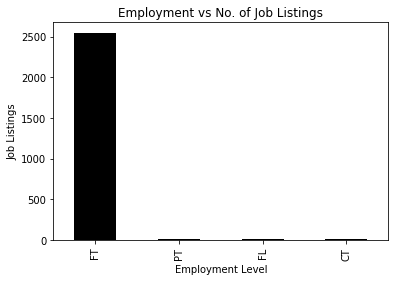

In [74]:
#Plotting Employment Level vs Number of Job Listings
fig, ax = plt.subplots()
bars = employment.plot(kind="bar", title = "Employment vs No. of Job Listings", color = 'black')
ax.set_xlabel('Employment Level')
ax.set_ylabel('Job Listings')
plt.show()

## Job Title vs Salary

In [75]:
##Job Title Grouped Data Based on Salary
jts = df.groupby("job_title")["salary_in_usd"].mean().reset_index()
jts = round(jts,2)
jts  

,job_title,salary_in_usd
0,3D Computer Vision Researcher,21352.25
1,AI Developer,136666.09
2,AI Programmer,55000.00
3,AI Scientist,110120.88
4,Analytics Engineer,150151.75
...,...,...
88,Research Engineer,165909.39
89,Research Scientist,153486.37
90,Software Data Engineer,62510.00
91,Staff Data Analyst,15000.00


In [76]:
#Getting the top 10 average salaries based on job title
top_10 = jts.sort_values(by=['salary_in_usd'], ascending = False)
top_10.head(10)

,job_title,salary_in_usd
46,Data Science Tech Lead,375000.00
19,Cloud Data Architect,250000.00
35,Data Lead,212500.00
28,Data Analytics Lead,211254.50
84,Principal Data Scientist,198171.12
53,Director of Data Science,195140.73
83,Principal Data Engineer,192500.00
75,Machine Learning Software Engineer,192420.00
8,Applied Scientist,190342.58
85,Principal Machine Learning Engineer,190000.00


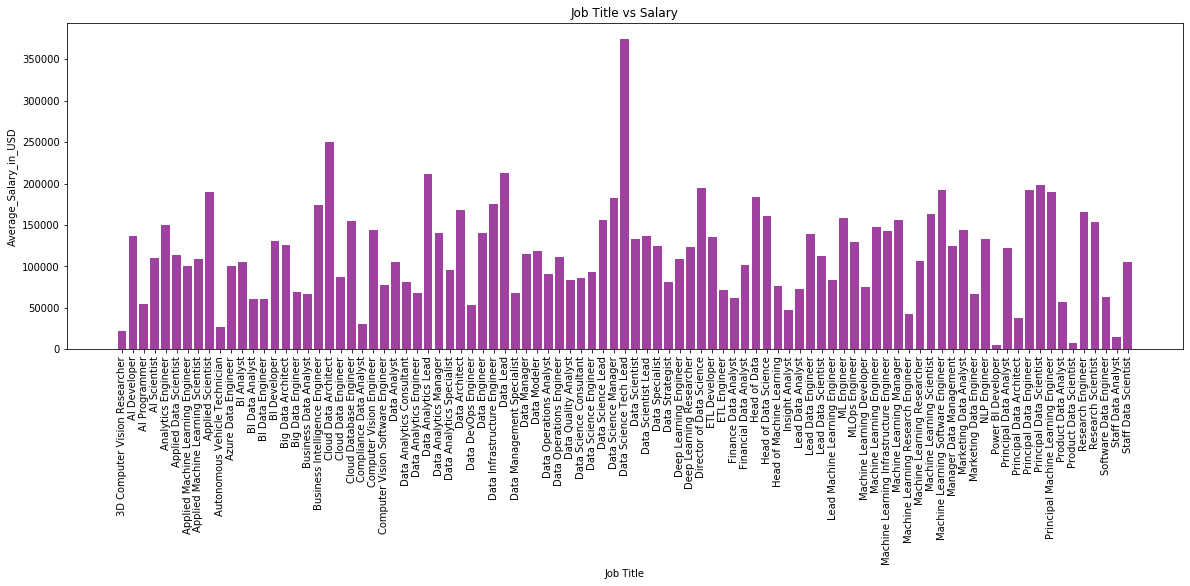

In [81]:
#Plotting Job Title vs Salary
fig = plt.figure(figsize = (20,6))
plt.bar(jts["job_title"], jts["salary_in_usd"], color = 'purple', alpha = 0.75)
plt.xlabel("Job Title")
plt.ylabel("Average_Salary_in_USD")
plt.title("Job Title vs Salary")
plt.xticks(rotation = 90)
plt.show()

## Top 10 Job Titles Based on Average Salary

1. Data Science Tech Lead
2. Cloud Data Architect
3. Data Lead
4. Data Analytics Lead
5. Principal Data Scientist
6. Director of Data Science
7. Principal Data Engineer	
8. Machine Learning Software Engineer
9. Applied Scientist
10. Principal Machine Learning Engineer

## Company_size vs Remote_Ratio

In [78]:
##Company Size Data Based on Remote_Ratio
cs = df.groupby("company_size")["remote_ratio"].mean().reset_index()
cs = round(cs,2)
cs  

,company_size,remote_ratio
0,L,63.57
1,M,46.23
2,S,72.79


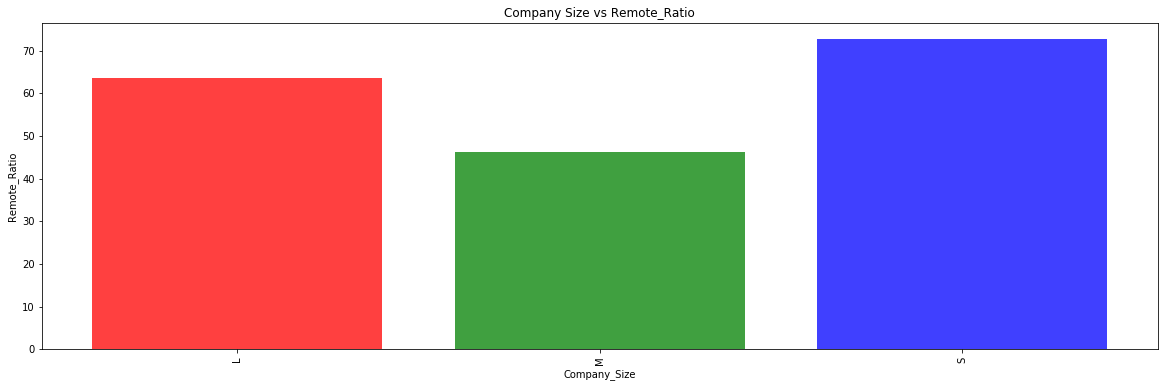

In [82]:
#Plotting Company_size vs Remote_Ratio
fig = plt.figure(figsize = (20,6))
color = ["red", "green", "blue"]
plt.bar(cs["company_size"], cs["remote_ratio"], color = color, alpha = 0.75)
plt.xlabel("Company_Size")
plt.ylabel("Remote_Ratio")
plt.title("Company Size vs Remote_Ratio")
plt.xticks(rotation = 90)
plt.show()